In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import time
from ast import literal_eval
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing as mp
import re


In [4]:
number_of_players =1
color_palette = ['-b', '-g', '-r', '-c', '-m', '-y' , '-k', '-w'] 
goal_frequency_window = 20

number of episodes finished 129
number of time-steps finished 64500
OutOfTime    129
Name: why, dtype: int64


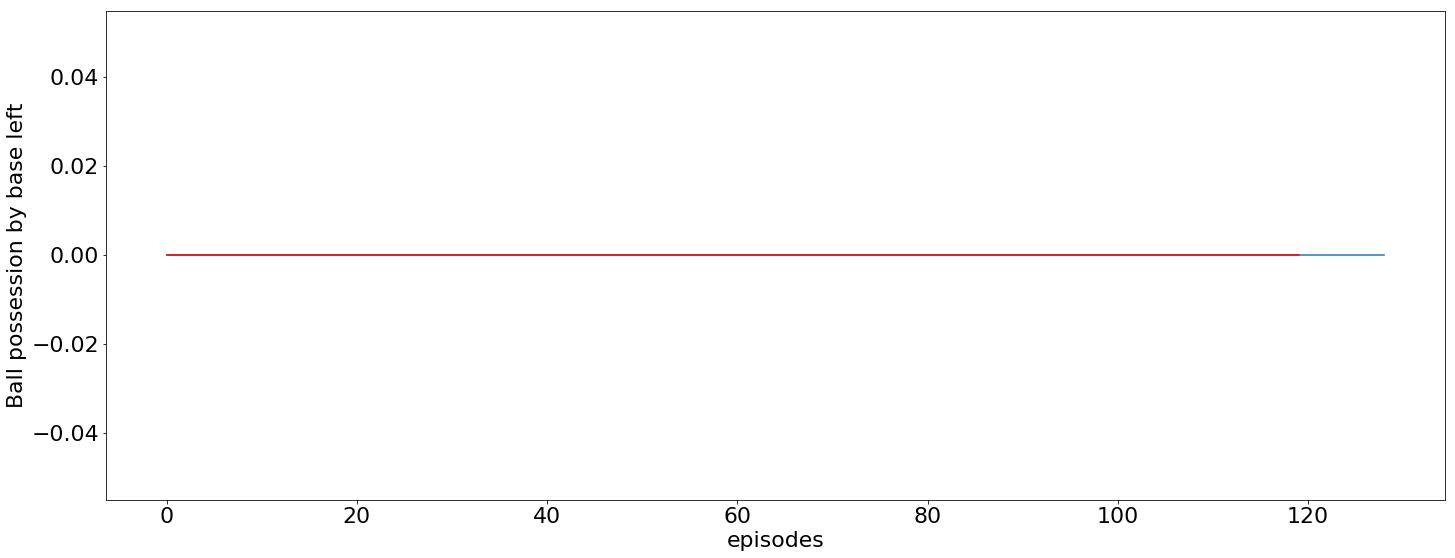

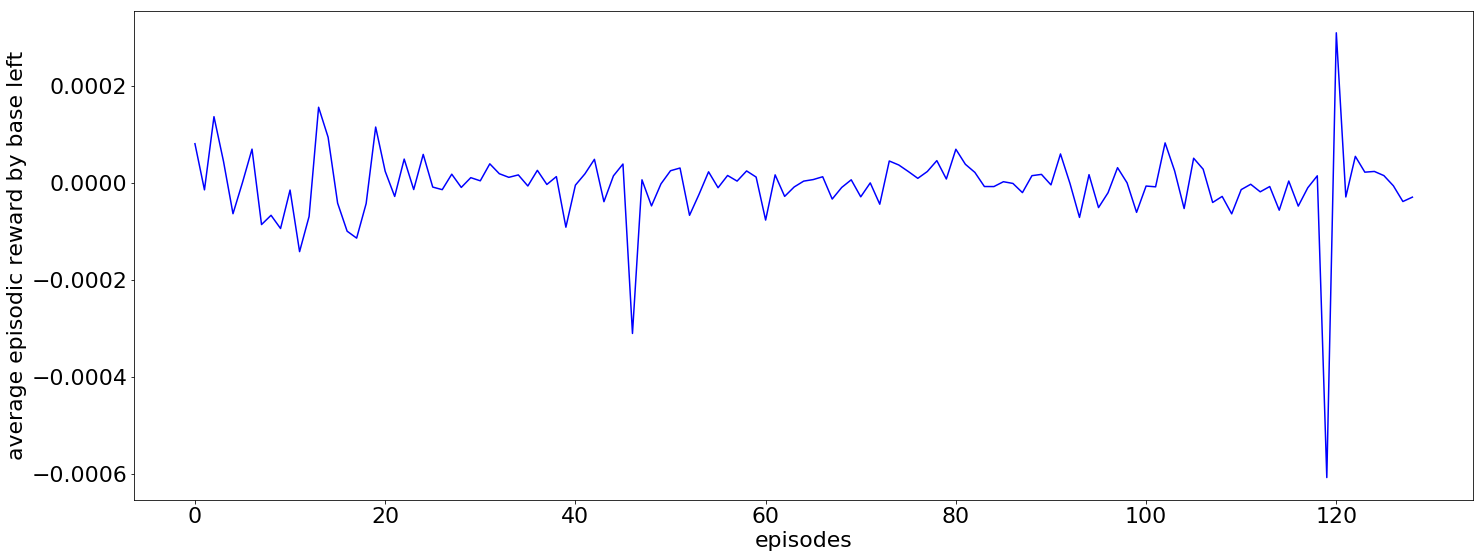

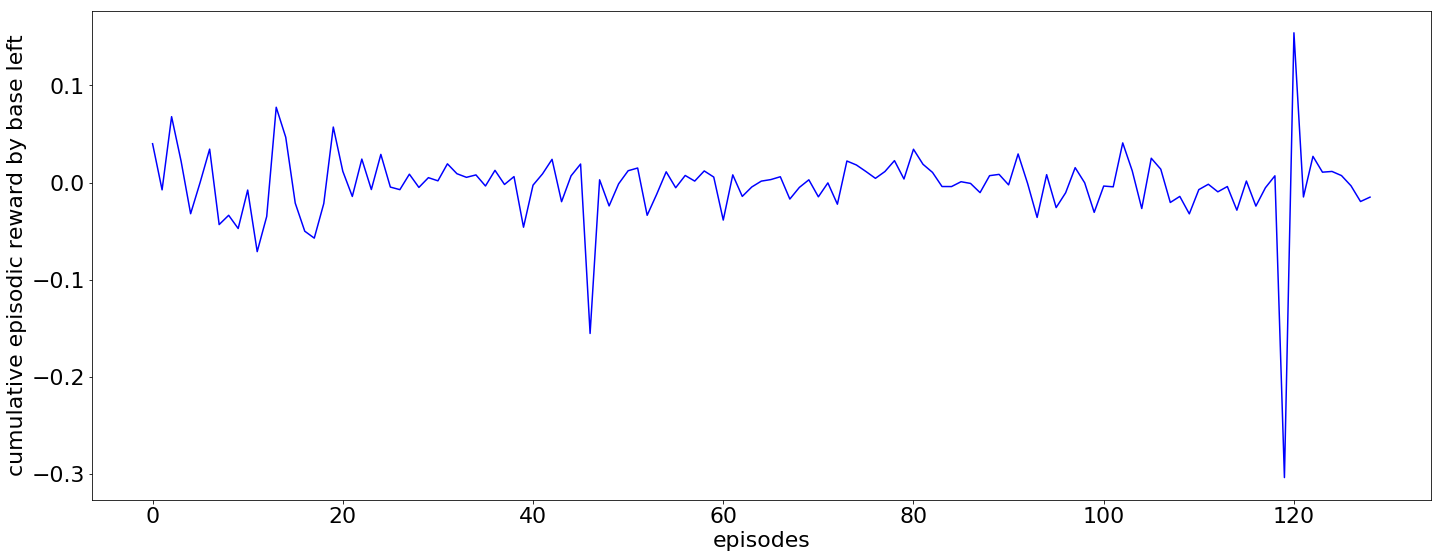

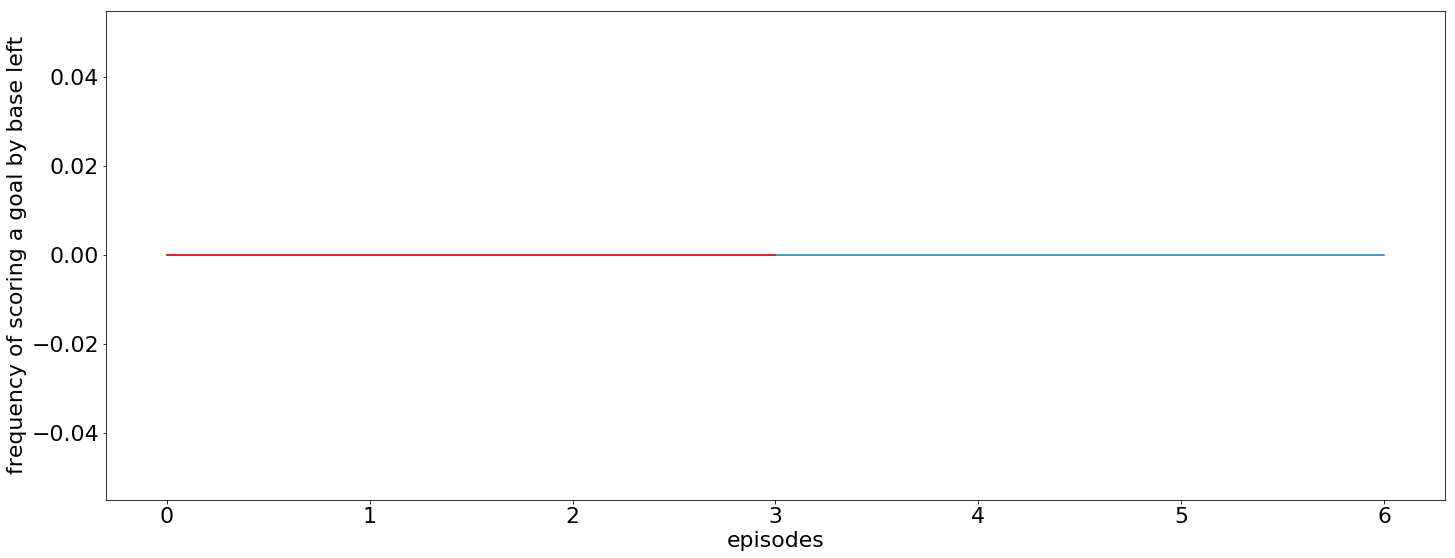

number of episodes finished 129
number of time-steps finished 64500


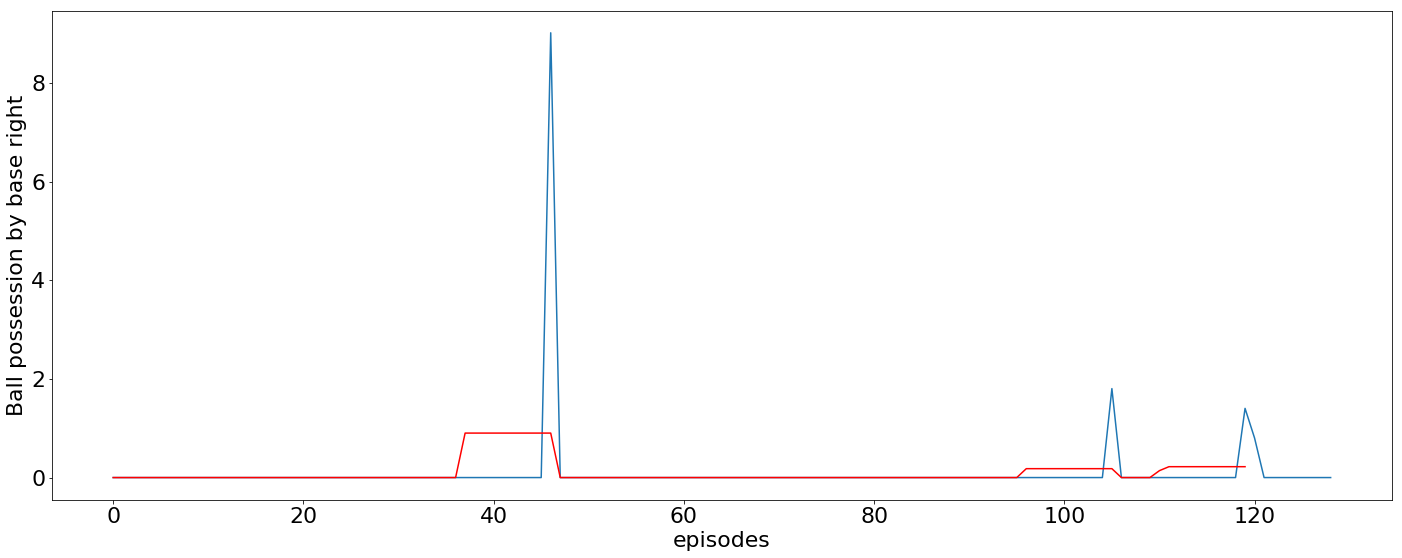

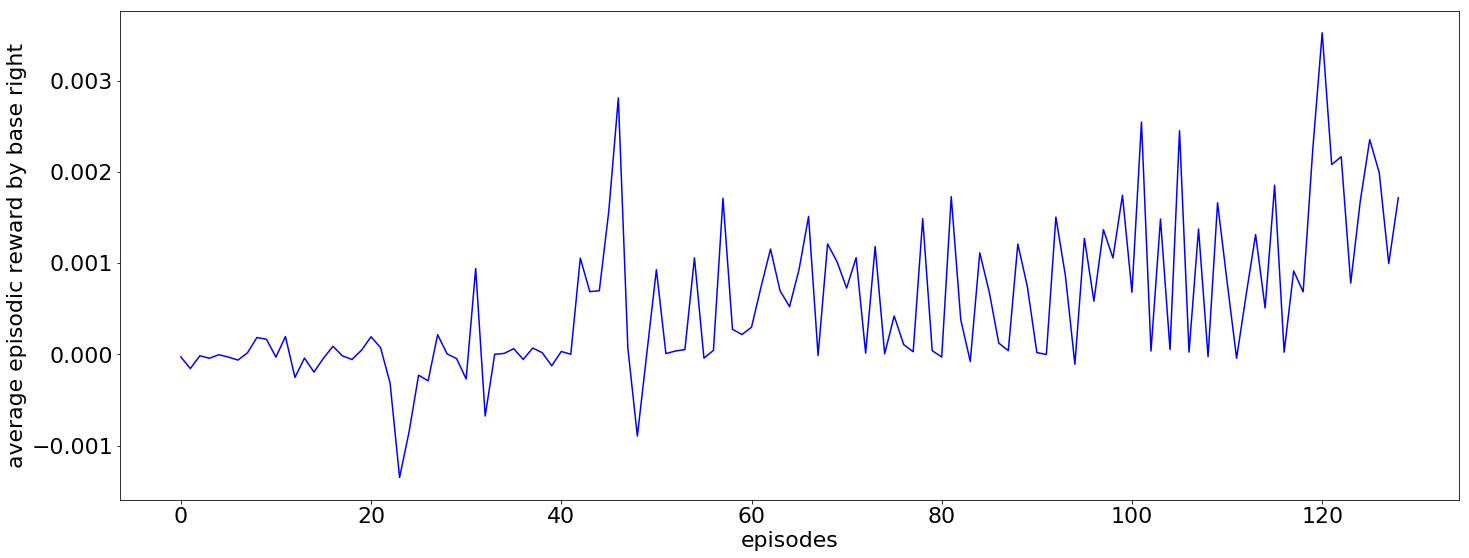

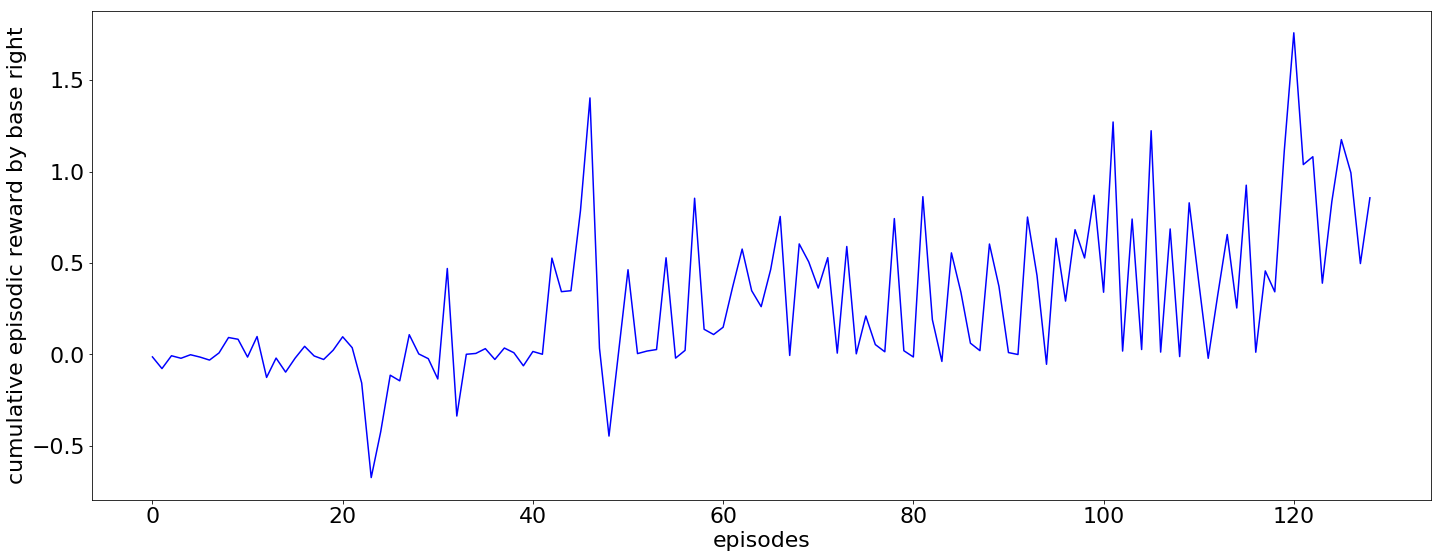

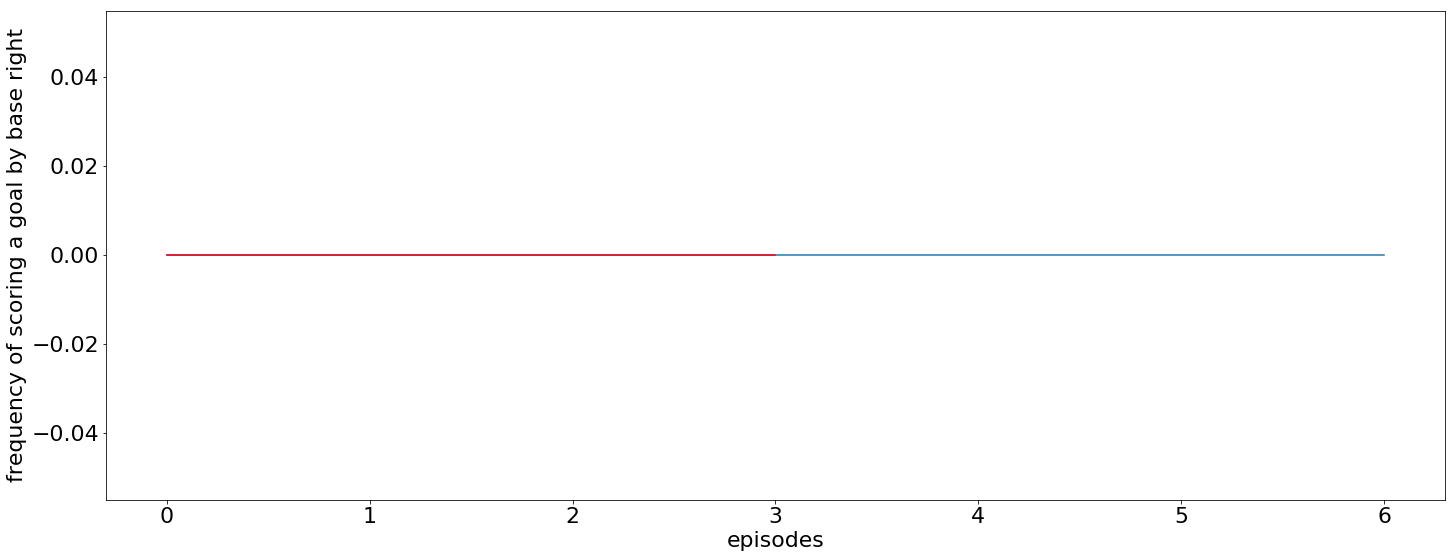

In [25]:
data = pd.read_csv('team_history.csv')

print('number of episodes finished %d'%len(data))

print('number of time-steps finished %d'%(len(data)*500))

    
print(data.why.value_counts())


######################################---ball possession  and smoothed curve---#########################################################

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(24,9))
plt.plot(data.kickable_percentages  )
plt.plot( np.convolve(data.kickable_percentages, np.ones((10,))/10, mode='valid'), '-r' )
plt.xlabel('episodes')
plt.ylabel('Ball possession by base left')
plt.show()



######################################--- average episodic reward and smoothed curve-----#########################################################



team_reward = []
for j in range(number_of_players):
    player_reward = []
    for i in range(len(data)):
        player_reward.append(literal_eval(data.average_reward[i])[j])
    team_reward.append(player_reward)
                 
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(24,9))
for k in range(number_of_players):
    plt.plot(team_reward[k], color_palette[k])
#plt.plot( np.convolve(np.ravel(reward) , np.ones((10,))/10, mode='valid'), '-r' )
plt.xlabel('episodes')
plt.ylabel('average episodic reward by base left')
plt.show()

######################################--- cumulative episodic reward and smoothed curve-----#########################################################
team_reward = []
for j in range(number_of_players):
    player_reward = []
    for i in range(len(data)):
        player_reward.append(literal_eval(data.cumulative_reward[i])[j])
    team_reward.append(player_reward)
                 
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(24,9))
for k in range(number_of_players):
    plt.plot(team_reward[k], color_palette[k])
#plt.plot( np.convolve(np.ravel(reward) , np.ones((10,))/10, mode='valid'), '-r' )
plt.xlabel('episodes')
plt.ylabel('cumulative episodic reward by base left')
plt.show()

#####################################################


goal_freq = []
for i in range(0, len(data), goal_frequency_window):
    temp = data.loc[i:i+goal_frequency_window].why.value_counts()
    
    try: 
        goal_freq.append(temp.Goal_By_Left)
    except AttributeError:
        goal_freq.append(0)
        
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(24,9))
plt.plot(goal_freq)
plt.plot( np.convolve(np.ravel(goal_freq) , np.ones((10,))/10, mode='valid'), '-r' )
plt.xlabel('episodes')
plt.ylabel('frequency of scoring a goal by base left')
plt.show()

data = pd.read_csv('opp_history.csv')

print('number of episodes finished %d'%len(data))

print('number of time-steps finished %d'%(len(data)*500))

    
#print(data.why.value_counts())

goal_frequency_window = 20

######################################---ball possession  and smoothed curve---#########################################################

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(24,9))
plt.plot(data.kickable_percentages  )
plt.plot( np.convolve(data.kickable_percentages, np.ones((10,))/10, mode='valid'), '-r' )
plt.xlabel('episodes')
plt.ylabel('Ball possession by base right')
plt.show()



######################################--- average episodic reward and smoothed curve-----#########################################################


team_reward = []
for j in range(number_of_players):
    player_reward = []
    for i in range(len(data)):
        player_reward.append(literal_eval(data.average_reward[i])[j])
    team_reward.append(player_reward)
                 
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(24,9))
for k in range(number_of_players):
    plt.plot(team_reward[k], color_palette[k])
#plt.plot( np.convolve(np.ravel(reward) , np.ones((10,))/10, mode='valid'), '-r' )
plt.xlabel('episodes')
plt.ylabel('average episodic reward by base right')
plt.show()

######################################--- cumulative episodic reward and smoothed curve-----#########################################################
team_reward = []
for j in range(number_of_players):
    player_reward = []
    for i in range(len(data)):
        player_reward.append(literal_eval(data.cumulative_reward[i])[j])
    team_reward.append(player_reward)
                 
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(24,9))
for k in range(number_of_players):
    plt.plot(team_reward[k], color_palette[k])
#plt.plot( np.convolve(np.ravel(reward) , np.ones((10,))/10, mode='valid'), '-r' )
plt.xlabel('episodes')
plt.ylabel('cumulative episodic reward by base right')
plt.show()

#####################################################


goal_freq = []
for i in range(0, len(data), goal_frequency_window):
    temp = data.loc[i:i+goal_frequency_window].why.value_counts()
    
    try: 
        goal_freq.append(temp.Goal_By_Right)
    except AttributeError:
        goal_freq.append(0)
        
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(24,9))
plt.plot(goal_freq)
plt.plot( np.convolve(np.ravel(goal_freq) , np.ones((10,))/10, mode='valid'), '-r' )
plt.xlabel('episodes')
plt.ylabel('frequency of scoring a goal by base right')
plt.show()

In [10]:
chunksize = len(content)//(mp.cpu_count() - 1)
list_content = []
for i in range(0,len(content)-chunksize, chunksize):
    list_content.append(content[i:i+chunksize])
    
pool = mp.Pool(processes = (mp.cpu_count() - 1))
results = pool.map( act_analyzer,  list_content)
pool.close()
pool.join()

results_df = pd.concat(results)

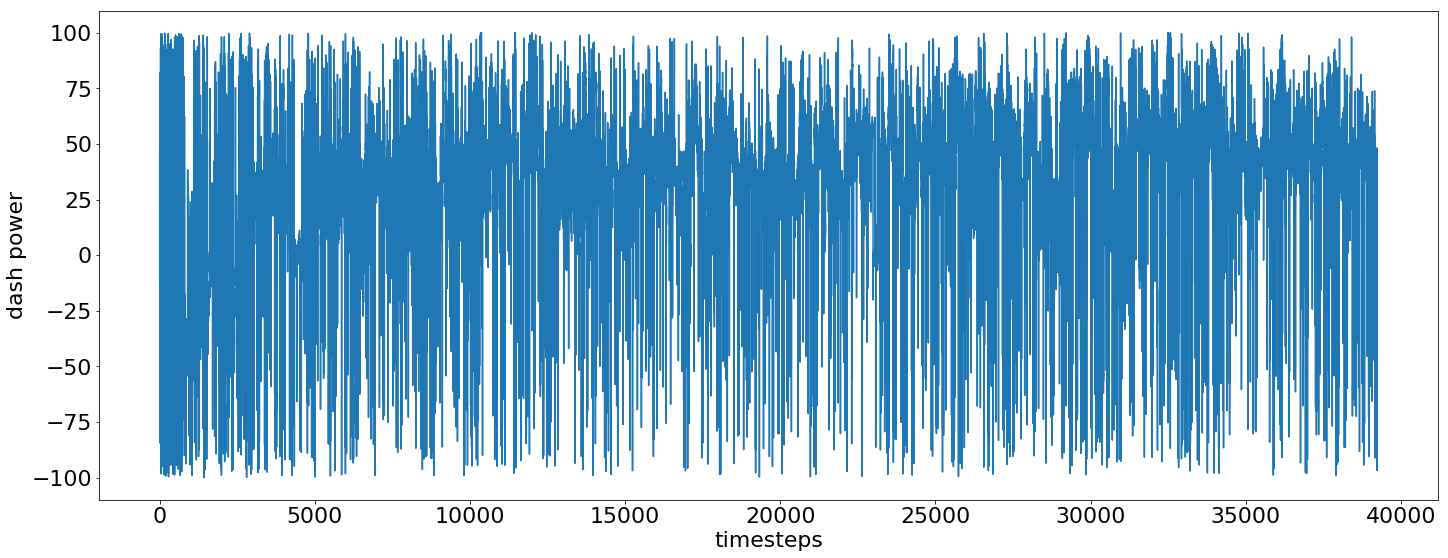

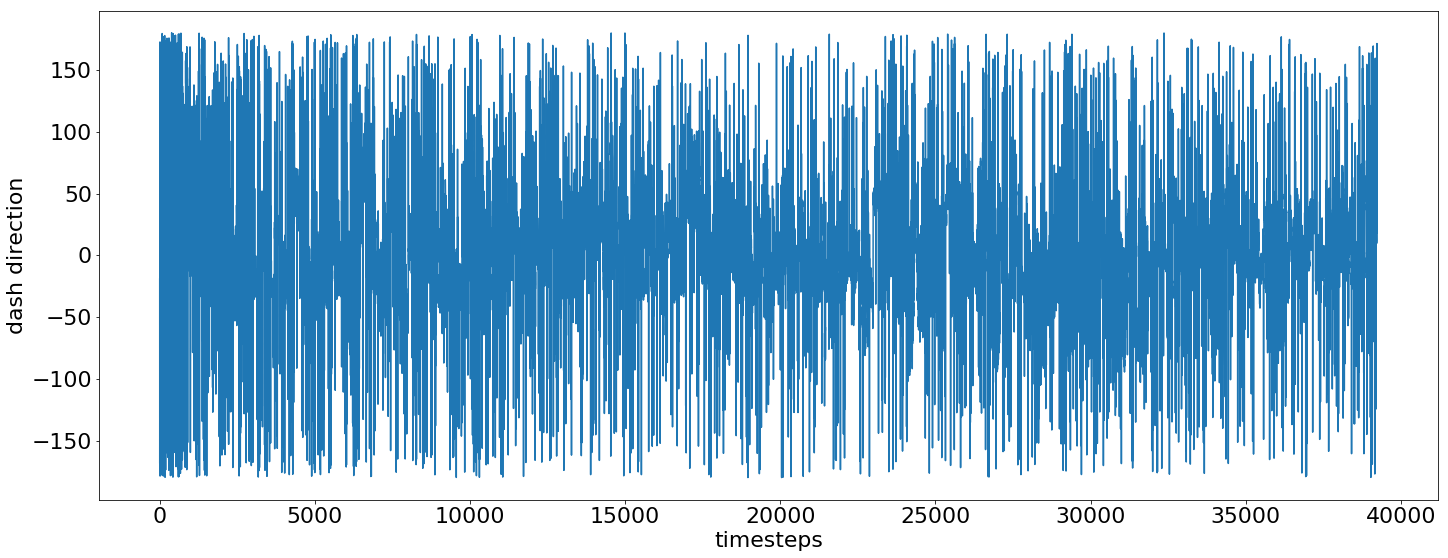

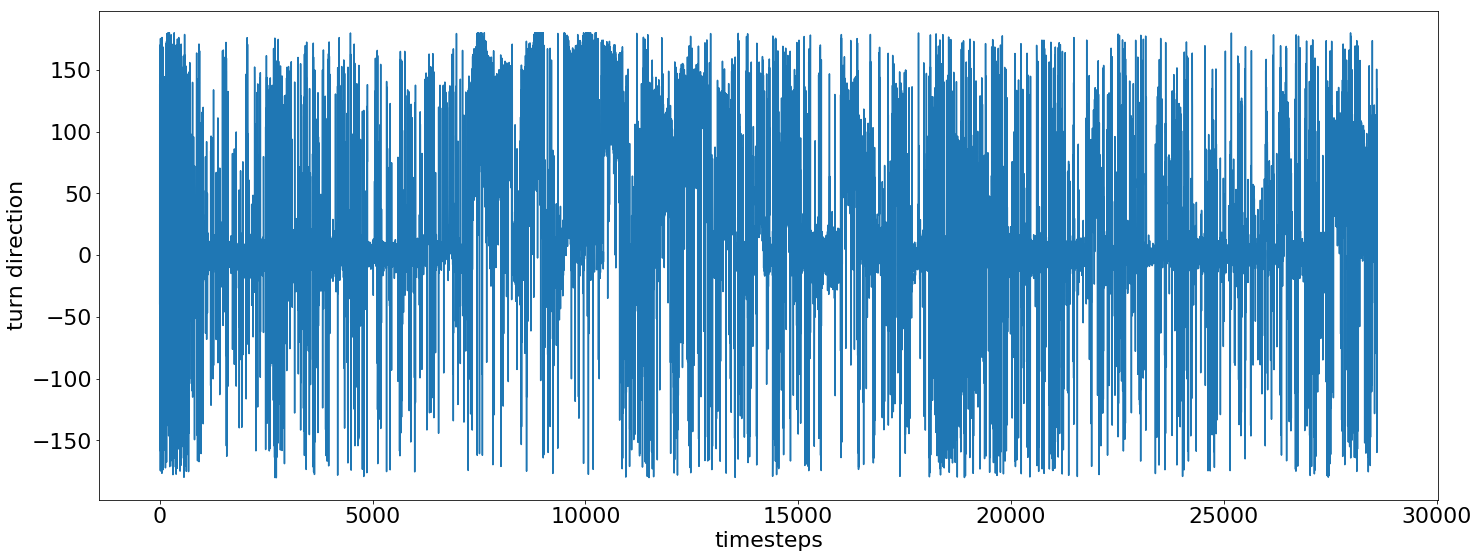

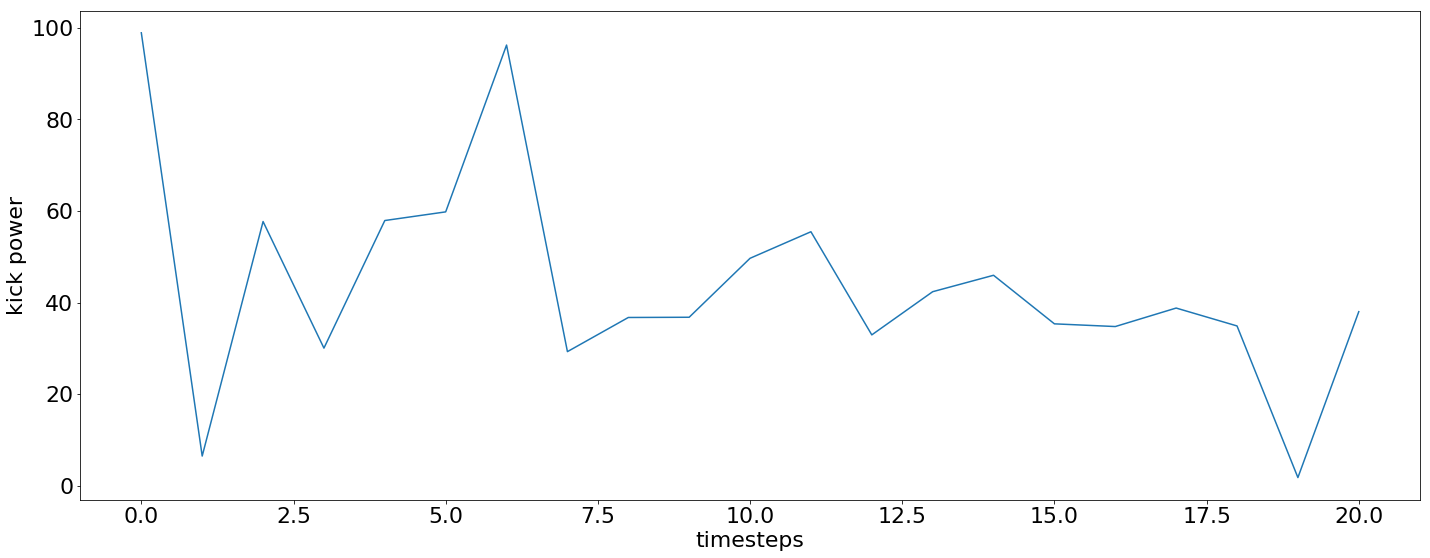

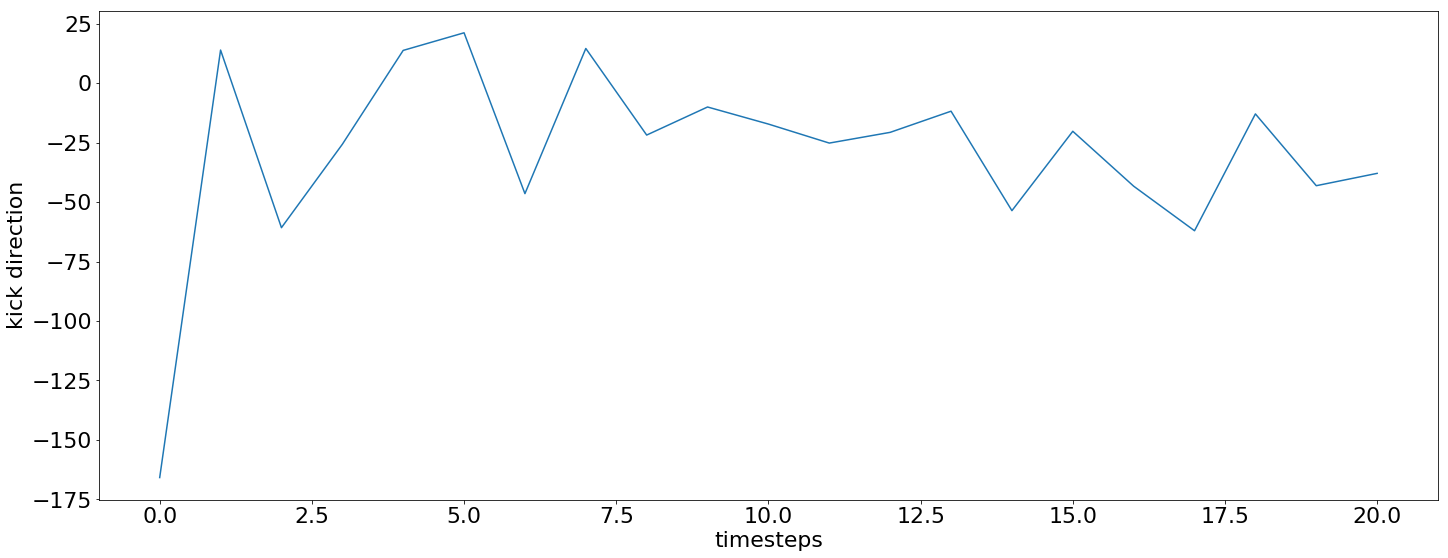

In [11]:
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(24,9))
plt.plot( range(len(results_df[results_df.act == 'dash'])), results_df[results_df.act == 'dash'].power )
plt.xlabel('timesteps')
plt.ylabel('dash power')
plt.show()


plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(24,9))
plt.plot( range(len(results_df[results_df.act == 'dash'])) , results_df[results_df.act == 'dash'].direction )
plt.xlabel('timesteps')
plt.ylabel('dash direction')
plt.show()



plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(24,9))
plt.plot( range(len(results_df[results_df.act == 'turn'])) , results_df[results_df.act == 'turn'].direction )
plt.xlabel('timesteps')
plt.ylabel('turn direction')
plt.show()


plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(24,9))
plt.plot( range(len( results_df[results_df.act == 'kick'])) , results_df[results_df.act == 'kick'].power )
plt.xlabel('timesteps')
plt.ylabel('kick power')
plt.show()


plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(24,9))
plt.plot( range(len( results_df[results_df.act == 'kick'])) , results_df[results_df.act == 'kick'].direction )
plt.xlabel('timesteps')
plt.ylabel('kick direction')
plt.show()